In [1]:
import pandas as pd
df = pd.read_csv('HR.csv') # Загрузили df
df.head(10)# узрели все его великолепие

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [2]:
(df.isna().mean()*100).round(2) # проверили на пропуски
# пропуски не обнаружили, спасибо нетология

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
department               0.0
salary                   0.0
dtype: float64

In [3]:
df.info()# чекнули основную инфу

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# делим выборки на числовие и категориальные
df_num = df[['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
df_cat = df[['left', 'department', 'salary', 'Work_accident','promotion_last_5years']]

In [5]:
# АНАЛлизируем числовые
df_num.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


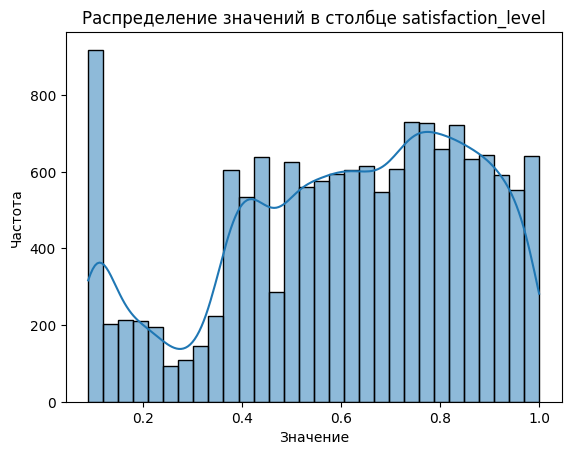

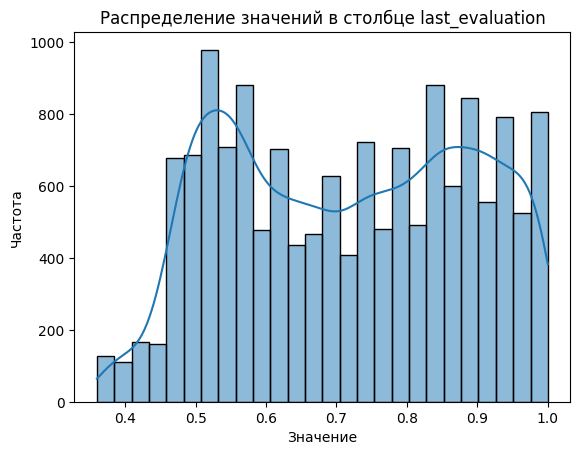

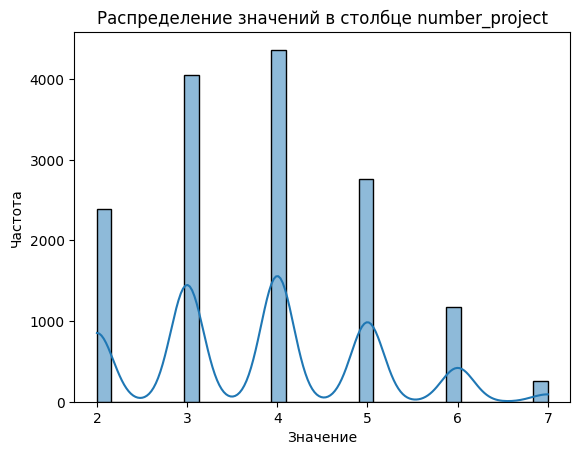

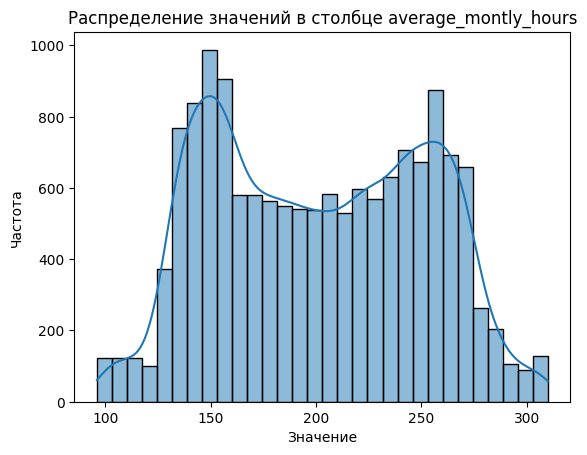

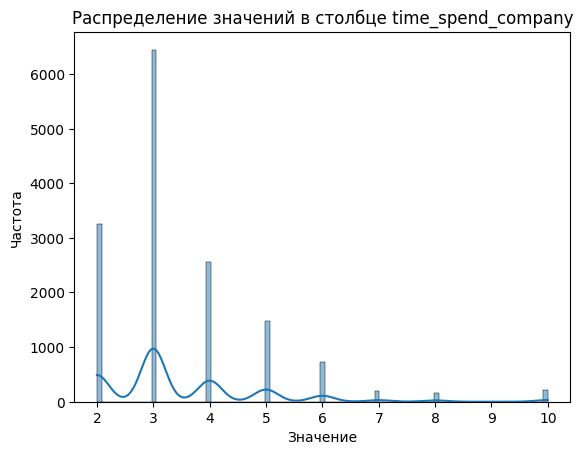

In [6]:
# на всякий глянем распредление этой шляпы
import matplotlib.pyplot as plt
import seaborn as sns

for column in df_num.columns:
    sns.histplot(df_num[column], kde=True)

    plt.title(f'Распределение значений в столбце {column}')
    plt.xlabel('Значение')
    plt.ylabel('Частота')

    plt.show()

In [7]:
# Очередь катеориальных
# Тут у нас значится значения
for column in df_cat.columns:
    print(column,':\n', df_cat[column].unique())


left :
 [1 0]
department :
 ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary :
 ['low' 'medium' 'high']
Work_accident :
 [0 1]
promotion_last_5years :
 [0 1]


In [8]:
# а тут их частота
for column in df_cat.columns:
    print(column,':\n', df_cat[column].value_counts())

# вот кстати ответ на вопрос сколько сотрудником в каждом депортаменте РАБотают

left :
 0    11428
1     3571
Name: left, dtype: int64
department :
 sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64
salary :
 low       7316
medium    6446
high      1237
Name: salary, dtype: int64
Work_accident :
 0    12830
1     2169
Name: Work_accident, dtype: int64
promotion_last_5years :
 0    14680
1      319
Name: promotion_last_5years, dtype: int64


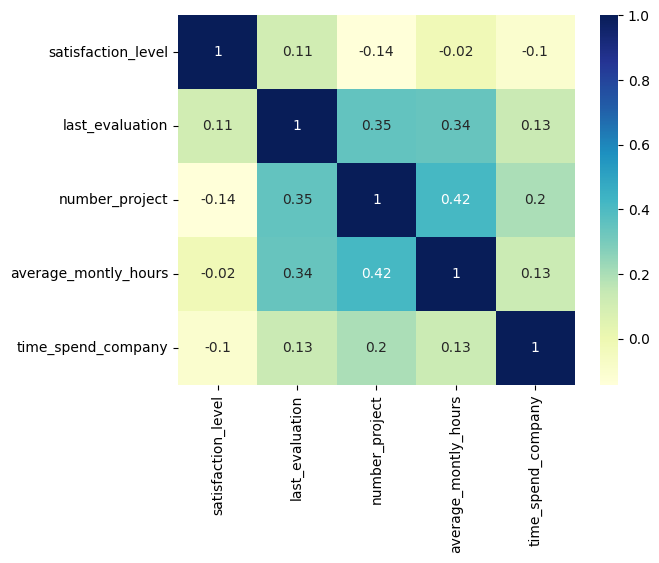

In [9]:
# Корр матрица
import matplotlib.pyplot as mp
import seaborn as sb

dataplot = sb.heatmap(df_num.corr(), cmap="YlGnBu", annot=True)

mp.show()  # самые корелирующие количество проектов и средние часы в месяц

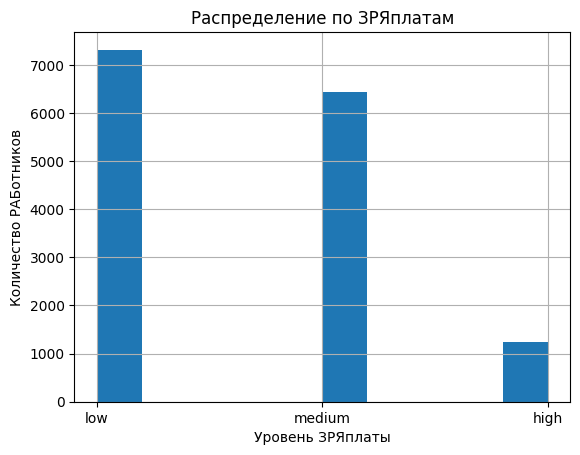

In [10]:
# распределение сотрудников по ЗРЯплатам

df_cat['salary'].hist()

plt.title('Распределение по ЗРЯплатам')
plt.xlabel('Уровень ЗРЯплаты')
plt.ylabel('Количество РАБотников')

plt.show()

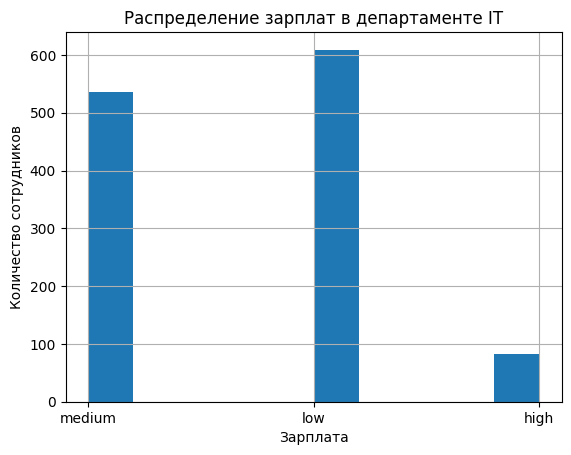

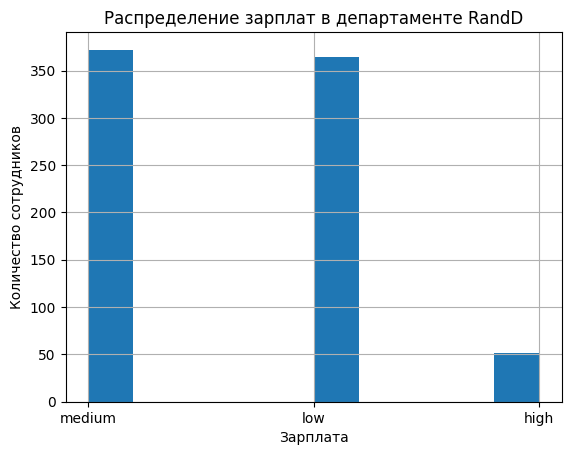

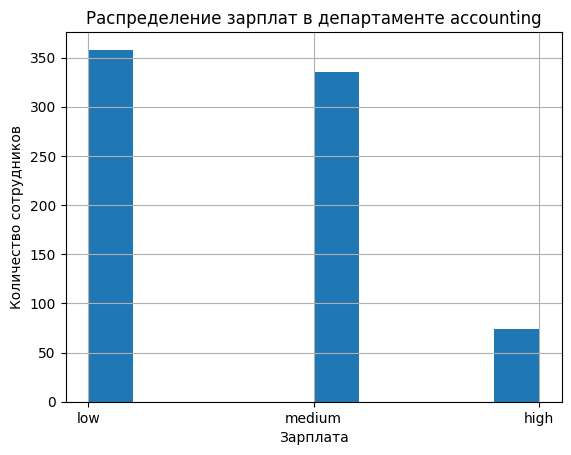

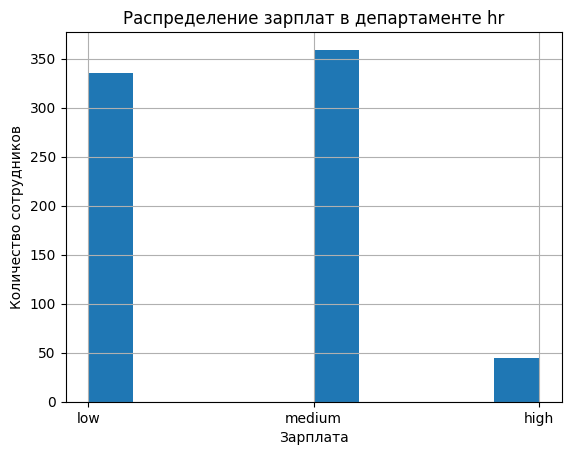

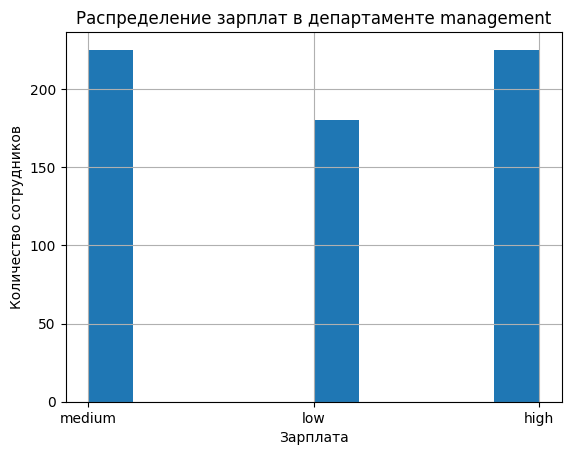

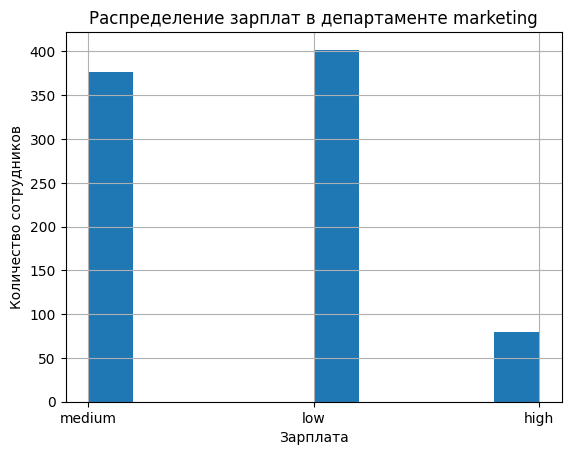

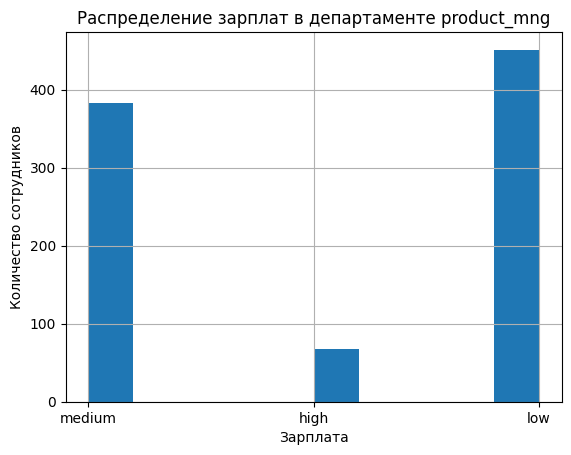

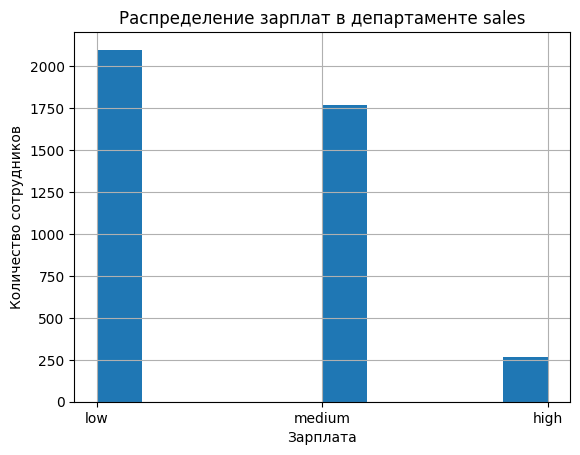

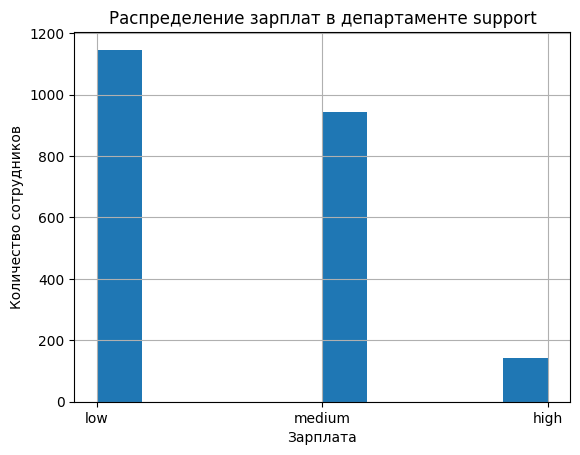

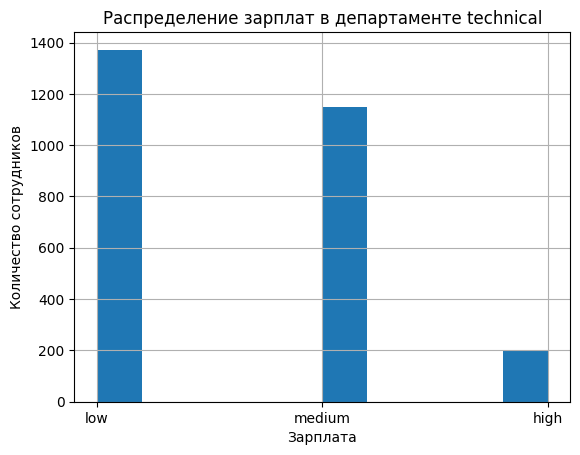

In [11]:
#  зарплаты по депортаментам
grouped = df.groupby('department')

for department, data in grouped:
    plt.figure()
    data['salary'].hist()
    plt.title(f'Распределение зарплат в департаменте {department}')
    plt.xlabel('Зарплата')
    plt.ylabel('Количество сотрудников')
    plt.show()

In [12]:
# Прверка гипотизы через дисперсию т.к вида зп 3
# Н0 время на РАБоте сотрудников с высокими и низкими зарплатами не влияет на зарплату
# Н1 время на РАБоте влияет на зарплаты сотрудников

from scipy import stats

high = df[df['salary'] == 'high']['average_montly_hours']
medium = df[df['salary'] == 'medium']['average_montly_hours']
low = df[df['salary'] == 'low']['average_montly_hours']

f_statistic, tests = stats.f_oneway(high, medium, low)

print(f' F-статистика: {f_statistic}')
print(f' результат: {tests}')

p_value = 0.05

if tests < p_value:
    print("Отвергаем нулевую гипотезу H0: Есть статистически значимые различия во времени на работе и ЗП")
else:
    print("Не отвергаем нулевую гипотезу Н0: Нет статистически значимых различий в уровне зп и часами на работе")

 F-статистика: 0.4583624407867663
 результат: 0.6323271153144614
Не отвергаем нулевую гипотезу Н0: Нет статистически значимых различий, отвергнуть Н0


In [23]:
# Показатели для уволившихся и не уволившихся

works = df[df['left'] == 0]
no_works = df[df['left'] == 1]

print('Среди работающих за 5 лет повысили: ',works['promotion_last_5years'].sum())
print('Среди уволившихся за 5 лет повысили: ',no_works['promotion_last_5years'].sum(),'\n')

print('Среди работающих средний уровень удовлетворенности: ',works['satisfaction_level'].mean().round(2))
print('Среди уволившихся средний уровень удовлетворенности: ',no_works['satisfaction_level'].mean().round(2),'\n')

print('Среднее количество проектов  среди работающих : ',works['number_project'].mean().round(2))
print('Среднее количество проектов  среди уволившихся : ',no_works['number_project'].mean().round(2))

# результаты логичны и закономерны, работали столько же, нравилось меньше и не повышали

Среди работающих за 5 лет повысили:  300
Среди уволившихся за 5 лет повысили:  19 

Среди работающих средний уровень удовлетворенности:  0.67
Среди уволившихся средний уровень удовлетворенности:  0.44 

Среднее количество проектов  среди работающих :  3.79
Среднее количество проектов  среди уволившихся :  3.86
